# Example Jupyter-Notebook for mrbles analysis package

#### *Author: Björn Harink*  
*Last update: 20180710*  
*Set: PyPI shipped example data*  
*Description:* Short pipeline example for mrbles analysis package using shipped sample data.

Load mrbles package. This should depict:

`Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  x.x.x`

In [1]:
import mrbles

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.11.6


Additional required imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# For fancy interactive Plotly graphs
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Download example files from: https://github.com/FordyceLab/MRBLEs/tree/master/data

Set package_path where you unpacked all the files.

In [3]:
package_path = '../data/'

## Load MRBLE library information

Load excel file with information about the the MRBLES library. Please use example file.

Main information that needs to in there are the different ratios (e.g. Dy, Sm, Tm). The code number starts from 0 and is based on the row number. Additional code numbers can be given (for instance when using a partial code set), but this not influence the code calling. All additional columns  provided in the classes are added as information, with a `info.` as prefix.

In [4]:
mrbles_library_info = pd.read_excel(package_path + 'mrbles-library-info-example.xlsx')

In [5]:
mrbles_library_info

,code,sequence,repeat,set,info,Dy,Sm,Tm
0,1,AGIVPIHVTHAPGEE,NaN,match,Scramble,0.00000,0.00000,0.00000
1,2,HPVIVITGPHEE,NaN,match,PVIVIT-WT,0.00000,0.00000,0.08449
2,3,HPRIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.28960
3,4,HPLIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.78752
4,5,HPVIVIEGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.00000
5,6,HPVIVLTGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.08449
6,7,IPVIVITGPHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.28960
7,8,HPVIVITGLHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.78752
8,9,HPVIVITMPHEE,NaN,match,PVIVIT-Flank,0.00000,0.25050,0.00000
9,10,HPKIVITGPHEE,NaN,match,PKIVIT-Core,0.00000,0.25050,0.08449


## Load sample images using: 'mbrles.Images'

Load the folder paths and filenames.

In [6]:
image_folders = {'Set A': package_path,
                 'Set B': package_path
}

image_patterns = {"Set A" : "peptide_biotin_streptavidin_.*.tif",
                  "Set B" : r"peptide_biotin_streptavidin_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif"
}

flat_field_image = package_path + "\\20180328-FF-Cy5-E-81im-BIN2.tif"

mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 10 files in Set A
Found 10 files in Set B


Load images in memory.

In [7]:
mrbles_images.load()

By calling the `mrbles_images` object you can see the dataframe.

In [8]:
mrbles_images

{'Set A': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[121, ..., 132],
         ...,
         [128, ..., 136]],

        ...,

        [[116, ...,  81],
         ...,
         [103, ..., 117]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[121, ..., 132],
         ...,
         [128, ..., 136]],

        ...,

        [[116, ...,  81],
         ...,
         [103, ..., 117]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' 'l-474' 'l-536

Rename channels, if desired.

In [9]:
mrbles_images.rename_channel('Cy5_5%', 'Cy5')

Check channel names by selecting one of the image sets and add `.c`

In [10]:
mrbles_images['Set A'].c

<xarray.DataArray 'c' (c: 11)>
array(['Cy5', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572',
       'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' 'l-474' 'l-536' 'l-546' ...

You can access an individual images like this:

Apply flat-field correction, if desired.

In [11]:
mrbles_images.flat_field(flat_field_image, 'Cy5')

In [12]:
mrbles_images['Set A', 3, 'Cy5']

<xarray.DataArray (y: 1024, x: 1024)>
array([[113., 145., 115., ..., 135., 135., 124.],
       [125., 134., 143., ..., 147., 180., 128.],
       [112., 124., 134., ..., 145., 182., 139.],
       ...,
       [123., 134., 117., ..., 153., 136., 148.],
       [125., 136., 136., ..., 167., 167., 135.],
       [128., 127., 117., ..., 165., 153., 138.]])
Coordinates:
    c        <U3 'Cy5'
Dimensions without coordinates: y, x

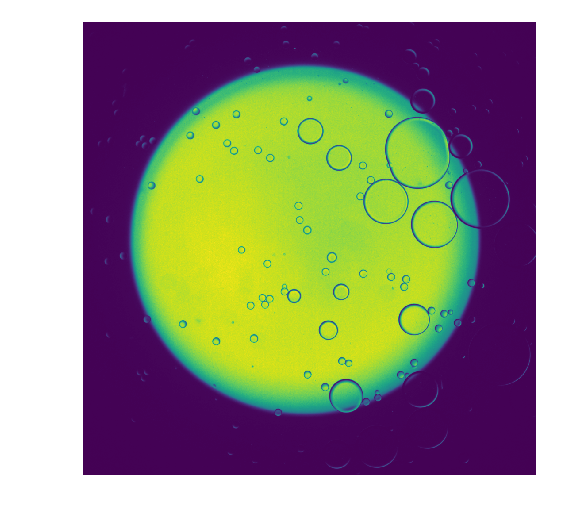

In [13]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Crop images to select an ROI, and/or to save memory in subsequent steps. ROI can changed multiple, since full images stay loaded inside object.

In [14]:
mrbles_images.crop_x = slice(80, 900)
mrbles_images.crop_y = slice(80, 900)

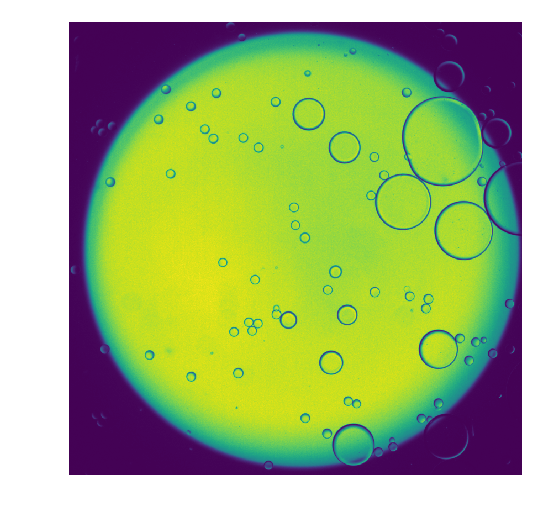

In [15]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Check flat-field correction before and after.

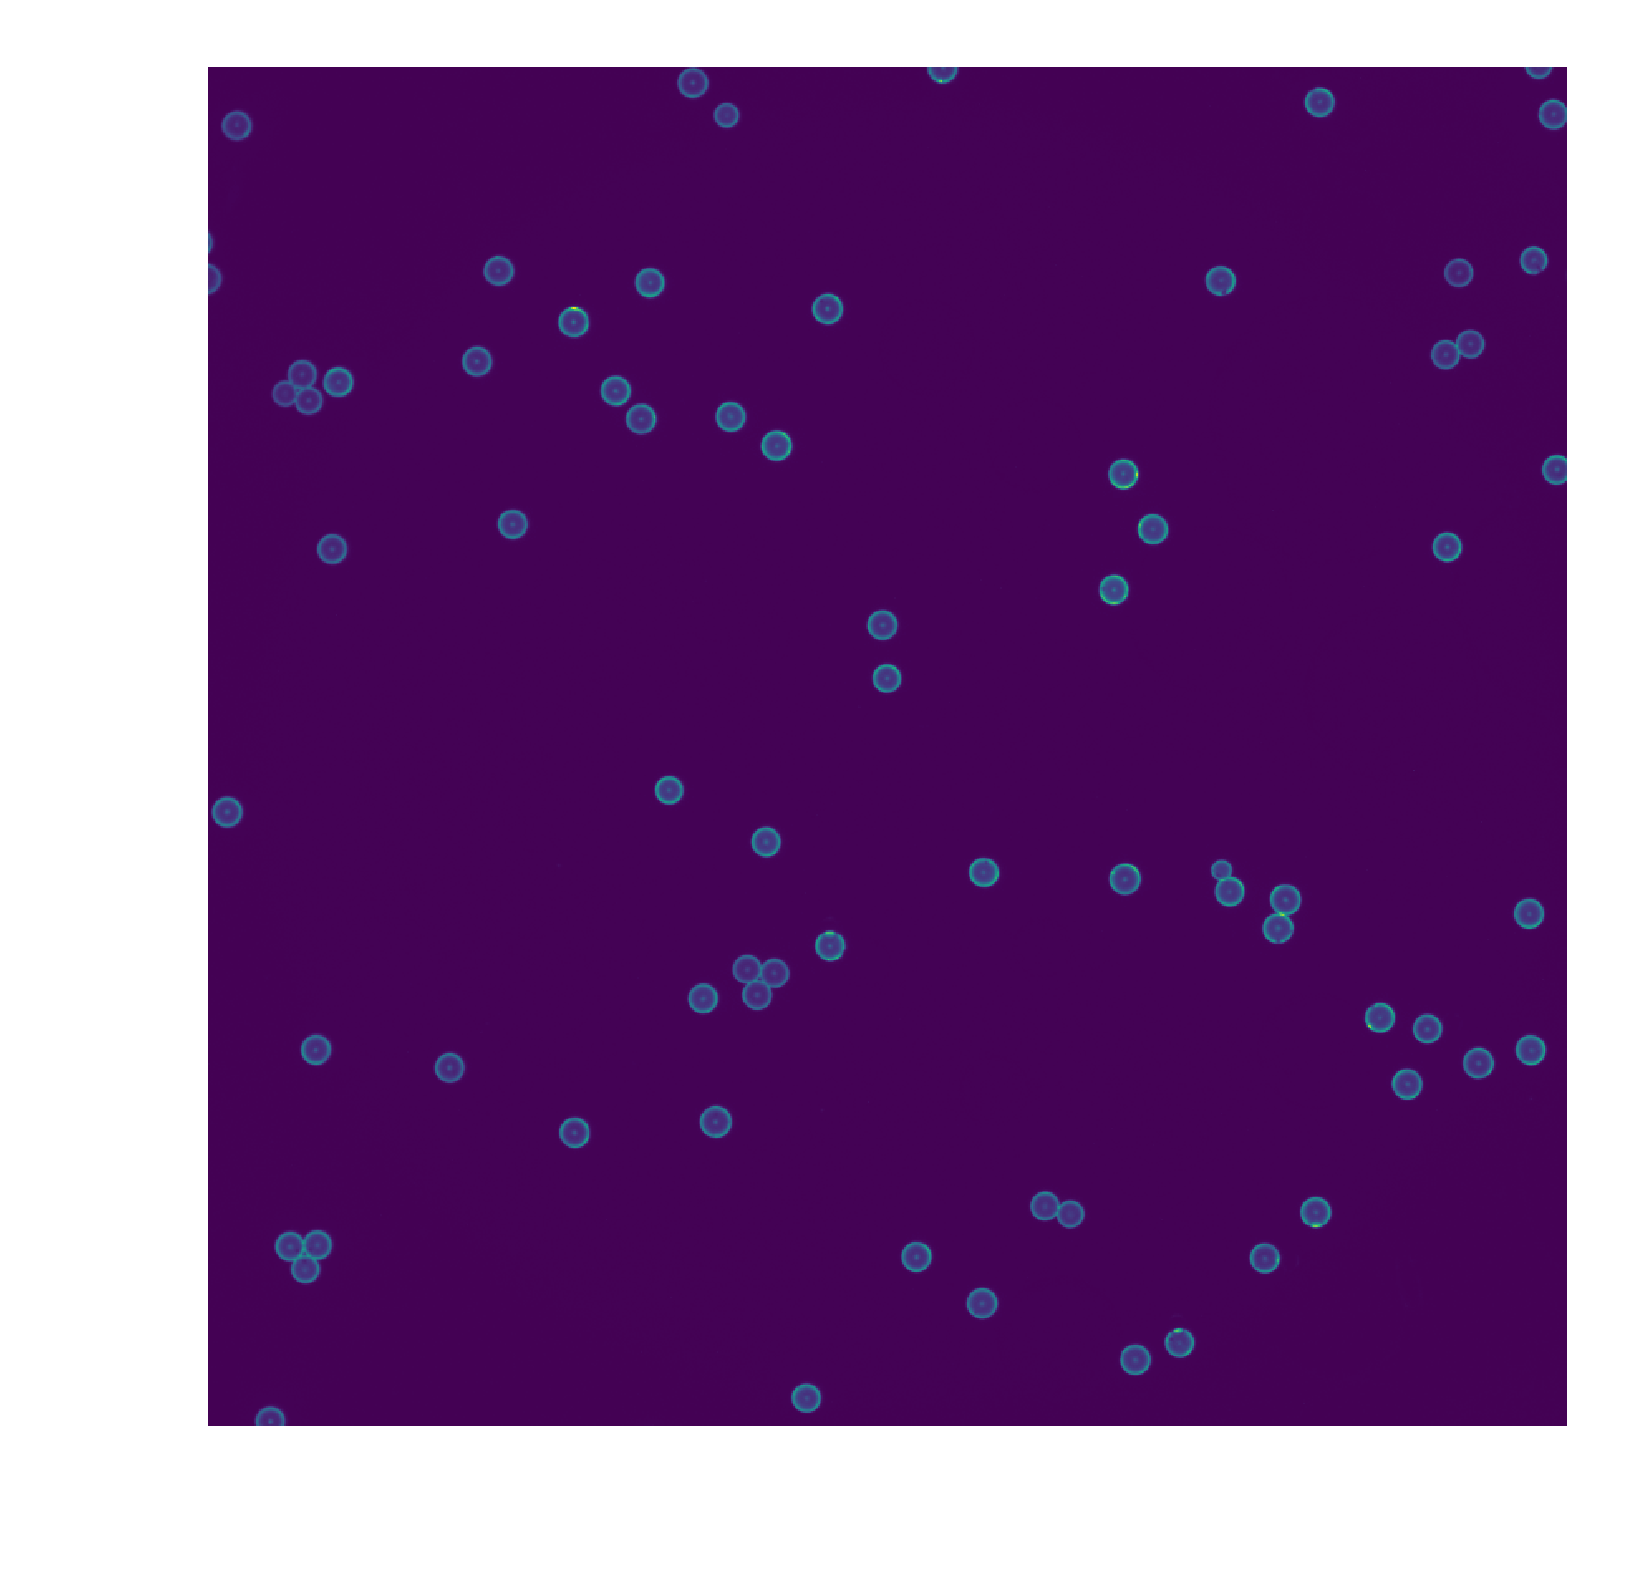

In [16]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5']);

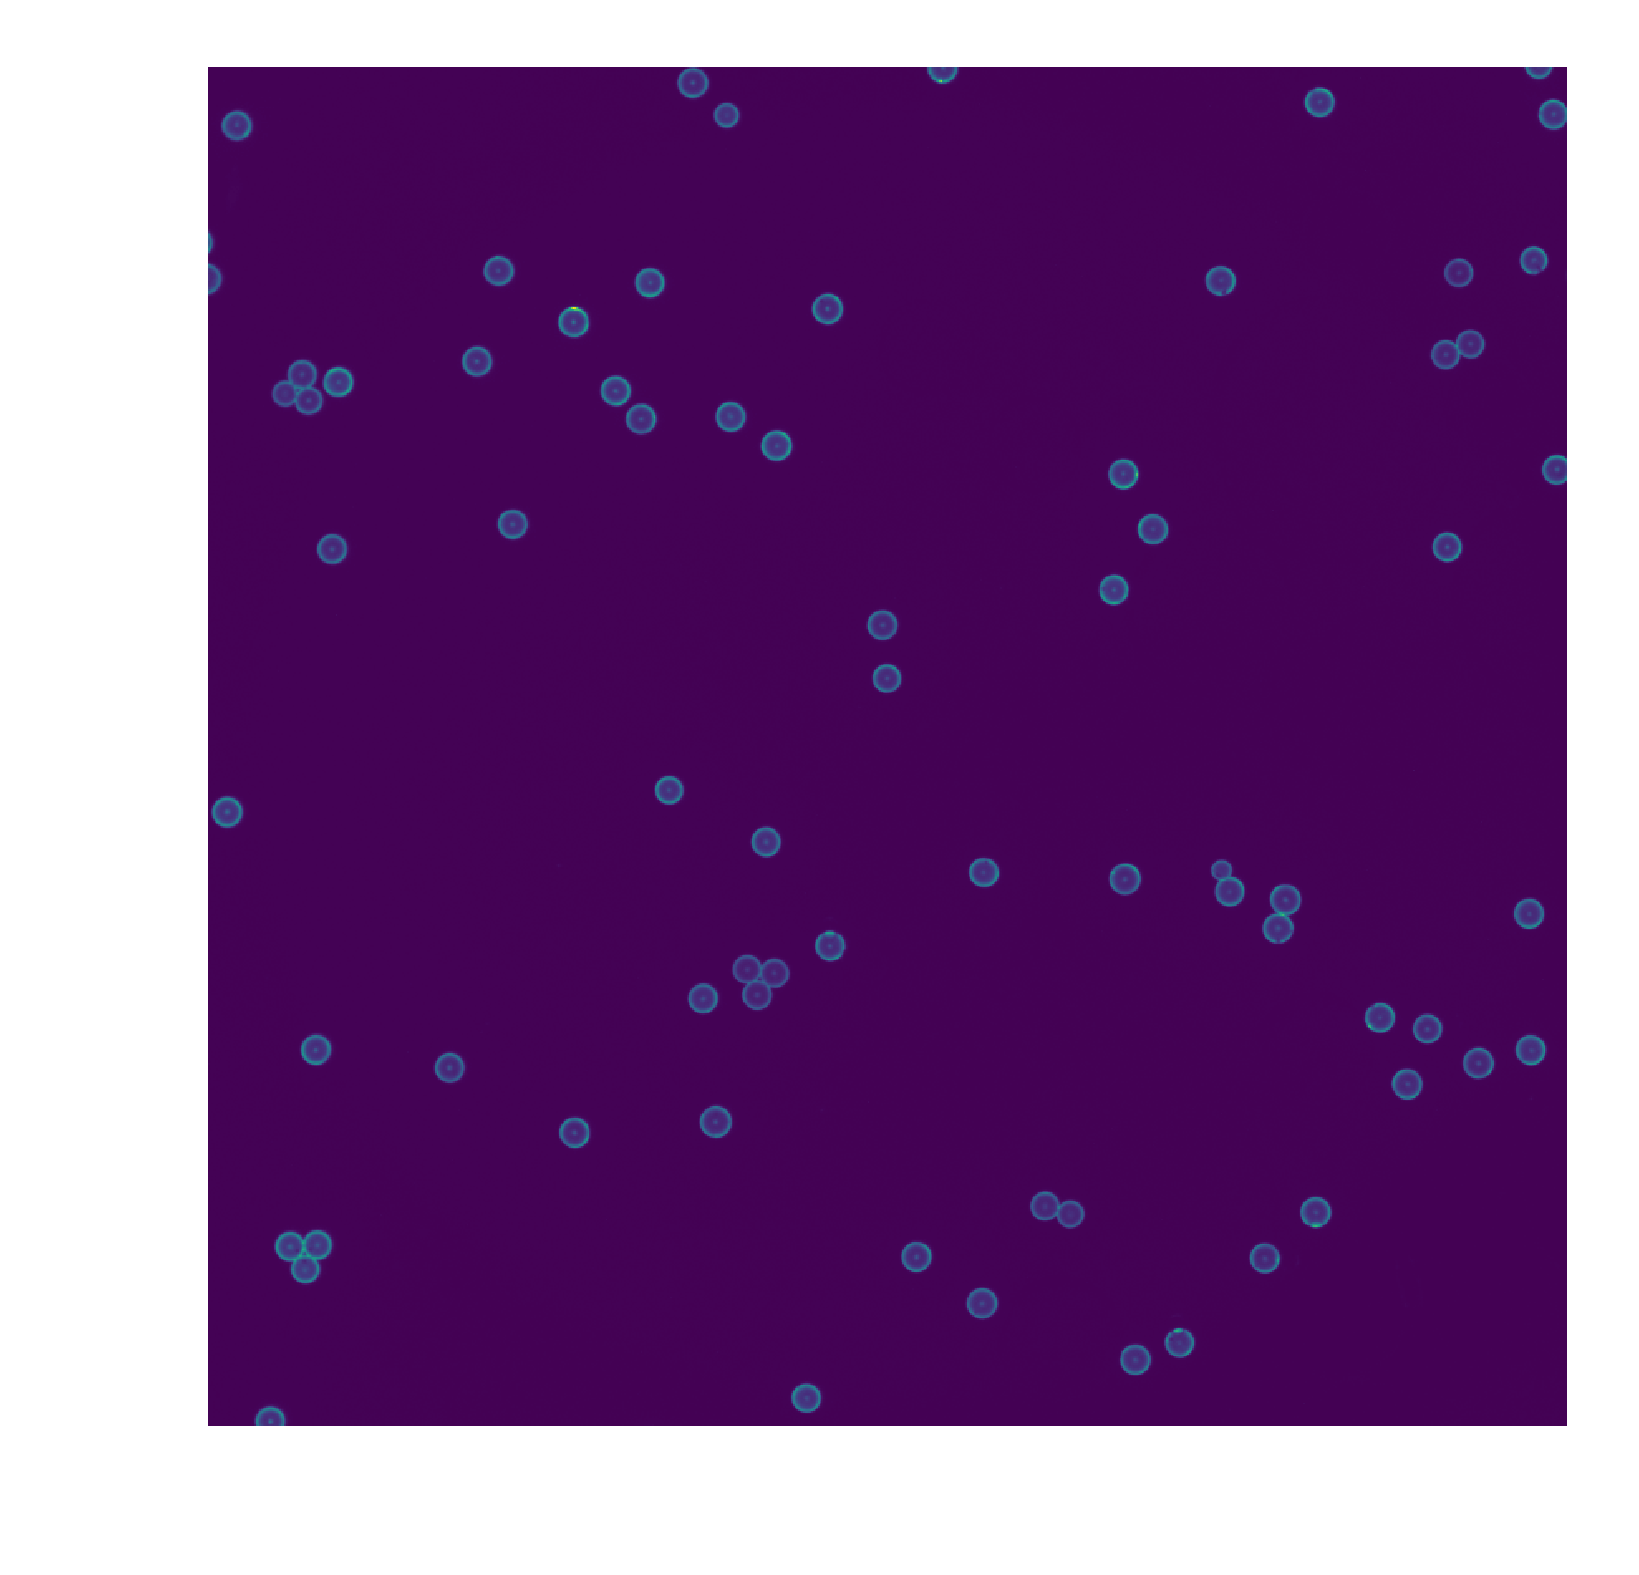

In [17]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5_FF']);

### Alternative image loading method
The alternative method (if not using OME-Tiff micro-manager image stacks) to load images is using Pyhton dictionaries with numpy arrays. As a demonstrator we convert the previously loaded images as numpy arrays.

In [18]:
set_A_np = mrbles_images['Set A'].values
set_B_np = mrbles_images['Set B'].values

In [19]:
set_A_np

array([[[[ 198.        ,  160.        ,  198.        , ...,
           210.        ,  184.        ,  170.        ],
         [ 181.        ,  203.        ,  161.        , ...,
           202.        ,  223.        ,  197.        ],
         [ 183.        ,  167.        ,  186.        , ...,
           195.        ,  200.        ,  223.        ],
         ...,
         [ 185.        ,  161.        ,  131.        , ...,
           225.        ,  219.        ,  197.        ],
         [ 184.        ,  204.        ,  182.        , ...,
           167.        ,  212.        ,  178.        ],
         [ 175.        ,  139.        ,  202.        , ...,
           191.        ,  192.        ,  207.        ]],

        [[ 130.        ,  125.        ,  135.        , ...,
           138.        ,  148.        ,  138.        ],
         [ 138.        ,  150.        ,  136.        , ...,
           134.        ,  132.        ,  133.        ],
         [ 154.        ,  163.        ,  103.        , .

The order of the numpy array must be file (f), channel (c), Y-axis (y), X-axis (x): `[f, c, y, x]`.

In [20]:
set_A_np.shape

(10, 12, 820, 820)

Insert numpy arrays into Pyhton dictionary.

In [21]:
image_data = {"Set A" : set_A_np,
              "Set B" : set_B_np
}

Create a list of channel names (must be same size as channel dimension size)

In [22]:
channels = ['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572', 'l-620', 'l-630', 'l-650', 'l-780']

Load images into mrbles.Images class.

In [23]:
mrbles_images_np = mrbles.Images(data=image_data, channels=channels)

In [24]:
mrbles_images_np

{'Set A': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[198., ..., 170.],
         ...,
         [175., ..., 207.]],

        ...,

        [[ 78., ..., 100.],
         ...,
         [103., ..., 101.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l-536' ...
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[198., ..., 170.],
         ...,
         [175., ..., 207.]],

        ...,

        [[ 78., ..., 100.],
         ...,
         [103., ..., 101.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l

In [25]:
mrbles_images_np['Set A'].c

<xarray.DataArray 'c' (c: 12)>
array(['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546',
       'l-572', 'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' 'l-435' 'l-474' 'l-536' ...

## Find MRBLEs in brigh-field images usin `mrbles.Find`

Only use `find_mrbles.settings.parallelize = True` on workstations with multiple CPU cores (>4), otherwise there is no performance gain. It also uses way more memory since it has spawn multiple Python instances.

In [26]:
find_mrbles = mrbles.Find(bead_size=18, pixel_size = 3.5, border_clear=True, circle_size=350)
find_mrbles.settings.parallelize = True

`find_mrbles.settings` is for internal settings. They all have a default setting, which should work in most cases. If necessary this can be tuned, however. Use `find_mrbles.settings` and then TAB to see a list of options.

Adaptive threshold imaging settings:  
`find_mrbles.settings.thr_block`: The scanning block size.  
`find_mrbles.settings.thr_c`: The leniency.  
Please see link for infomation: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html  
Use `find_mrbles.settings.img2bin()` for parameter testing. 

Filtering settings (default values are based on parameter `bead_size`, and therefore in pixels):  
`find_mrbles.settings.area_min`: Minimum area. Default: area x 0.5.  
`find_mrbles.settings.area_max`: Maximum area. Default: area x 1.5.  
`find_mrbles.settings.eccen_max`: Maximum eccentricity (0 being most circle, 1 being least circle). Default: 0.65.

These attributes can be read by calling:  
`find_mrbles.settings.area_min` 

In [27]:
find_mrbles.settings.area_min

63.61725123519331

These attributes can be read by calling:  
`find_mrbles.settings.area_min = 60` 

In [ ]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Show the final beads found and their dimenions: 

In [ ]:
find_mrbles.bead_dims

Example dimensions plot.

In [ ]:
find_mrbles.plot_size_dist()

Plot displaying bright-field image depicting found MRBLEs (crosses).

In [ ]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['Set A', 0, 'mask_check']);

## Create reference spectra using: `mblres.References`

Load all references and add background `bkg` image from the data-set to be invastigated. Choose region where there are no beads

In [ ]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": package_path,
    "Sm": package_path,
    "Tm": package_path,
    "Eu": package_path,
    "bkg": package_path
}

REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "peptide_biotin_streptavidin_01_MMStack_Pos0.ome.tif"  # Always change this!
}

In [ ]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(388, 542), slice(440, 620)]

Load files and generate reference spectra.

In [ ]:
spec_object.load()

Display and plot data.

In [ ]:
spec_object.data

In [ ]:
spec_object.plot()

## Generate spectral unmixed images and ratio images using: `mrbles.Ratio`

In [ ]:
ratio_images = mrbles.Ratio(spec_object)

In [ ]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu',  combine_data=mrbles_images[:, :, ['Cy5_FF']])

See channels generated in `ratio_images` object:

In [ ]:
ratio_images['Set A'].c.values.tolist()

Check inmixed images. Checking `Tm` and `bkg` since they share similar peak at 780 nm. If unmixing is not working properly it should show in the images.

In [ ]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'bkg']);

In [ ]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'Tm']);

## Extract data from each MRBLE using: `mrbles.Extract`

This is the step to use the masks from bead finding and select all channels you want the intensities to be extracted using and select which masks.

In [ ]:
extract_data = mrbles.Extract()

Select ratio images (for decoding), `Eu` and `bkg` (for filtering), and assay channels (e.g. Cy5). combine_data with bead dimensions.

In [ ]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5_FF']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
                 combine_data=find_mrbles.bead_dims)

In [ ]:
extract_data.filter()

In [ ]:
extract_data.data

Subtract background `Cy5_FF.mask_bkg` from flat-field corrected Cy5 signal from the ring `Cy5_FF.mask_ring` and add to data.

In [ ]:
extract_data.background_subtract('Cy5_FF.mask_ring', 'Cy5_FF.mask_bkg')

In [ ]:
extract_data.data

## Decode MRBLEs using: `mrbles.Decode`

Set up the decode part of the pipeline. Give it the targets as first parameter (only the targets!), and optionally the additional MRBLEs library information.

In [ ]:
mrbles_decode = mrbles.Decode(mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']], seq_list=mrbles_library_info)

In [ ]:
mrbles_decode.decode(extract_data.data.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], 
                     combine_data=extract_data.data)

Print codes and plot ratio data.

In [ ]:
mrbles_decode.plot_clusters_3D()

Filtered by confidence.

In [ ]:
mrbles_decode.plot_clusters_3D(confidence=0.95)

In [ ]:
mrbles_decode.plot_clusters_2D(['Dy', 'Sm'], ci_trace=0.95)

In [ ]:
mrbles_decode.plot_clusters_2D(['Sm', 'Tm'], ci_trace=0.95)

In [ ]:
mrbles_decode.plot_clusters_2D(['Tm', 'Dy'], ci_trace=0.95)

## Analyze data using `mrbles.Analyze`

Using the gathered data the data can be analyzed to return per-bead and per-code data. Also provided are a per-bead report and an overall quality control report.

In [ ]:
from importlib import reload

In [ ]:
reload(mrbles.report)
reload(mrbles.pipeline)
reload(mrbles)

In [ ]:
analyze = mrbles.Analyze(mrbles_decode, mrbles_library_info, ratio_images, find_mrbles)

In [ ]:
# analyze.analyze('Cy5_FF.mask_ring', confidence=0.95, bkg_data='Cy5_FF.mask_bkg')  # If background not calculated using mrbles.Extract
analyze.analyze('Cy5_FF.mask_ring_min_bkg', confidence=0.95)

In [ ]:
analyze.data_per_code

In [ ]:
analyze.data_per_bead

In [ ]:
# analyze.normalize(mrbles_decode.data.loc[(mrbles_decode.data.confidence>=0.95), ('code', 'Cy5_FF.mask_ring')])

In [ ]:
analyze.mrble_report('Cy5_FF', 'bead-report.pdf', set_name='Set A', codes=[0,1,2], files=[0,1,2])

In [ ]:
analyze.qc_report('qc-report.pdf', savefig=False)

In [ ]:
def _ellipses(means, covars, confidence):
    data_x = []
    data_y = []
    for i, (mean, covar) in enumerate(zip(means, covars)):
        v, w = np.linalg.eigh(covar)
        sigma = (1 - confidence) / 0.0255102040816327
        v = sigma * 2. * np.sqrt(v)
        angle = np.arctan2(w[1, 0], w[0, 0])
        angle = np.degrees(angle)

        # Plot an ellipse to show the Gaussian component
        a = v[1]
        b = v[0]
        x_origin = mean[0]
        y_origin = mean[1]

        theta = np.radians(np.arange(0.0, 360.0, 1.0))
        x = a * (np.cos(theta))
        y = b * (np.sin(theta))
        rtheta = np.radians(angle + 90)
        R = np.array([
             [np.cos(rtheta), -np.sin(rtheta)],
             [np.sin(rtheta), np.cos(rtheta)]
            ])

        x, y = np.dot(R, np.array([x, y]))
        x += x_origin
        y += y_origin
        data_x.append(x)
        data_y.append(y)
    return data_x, data_y

In [ ]:
covars = mrbles_decode.settings.gmm._gmix.covariances_[:][:, [0,1]][..., [0,1]]

In [ ]:
means = mrbles_decode.settings.gmm.means[:][: , [0, 1]]

In [ ]:
x_data, y_data = _ellipses(means, covars, 0.95)

In [ ]:
data_x = np.array(x_data).flatten()

In [ ]:
data_y = np.array(y_data).flatten()

In [ ]:
g = sns.FacetGrid(mrbles_decode.data[mrbles_decode.data.confidence > 0.95], col="info.Dy", col_wrap=2, sharey=True, sharex=True);
#g.map(sns.regplot, 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside', fit_reg=False,
#      scatter=True, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color':'black'});
g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False,
      scatter=True, scatter_kws={'alpha':0.1, 'color':'green'}, line_kws={'color':'black'});
# sns.regplot(data_x, data_y, fit_reg=False, 
#             scatter=True, scatter_kws={'alpha':0.1, 'color':'darkgrey', 's':1}, line_kws={'color':'black'});
plt.legend(['Pre-ICP', 'Post-ICP'])
g.axes[0].set_ylim(-0.1,1.1)
g.axes[0].set_xlim(-0.1,1.1)
# g.map(sns.regplot, 'Sm_ratio.mask_inside_icp', 'Tm_ratio.mask_inside_icp', fit_reg=False, 
#       data = mrbles_data[mrbles_data.confidence <= 0.95],
#       scatter=True, scatter_kws={'alpha':0.1, 'color':'red'}, line_kws={'color':'black'});
#g.savefig(r'D:\Per-Dy-Level-SmTm_C.pdf', dpi=300)